# 3. Coordinate Systems and Axes

In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.pylab as pylab
import calendar
import random
random.seed(42)

## Cartesian coordinates

Figure 3-1. Standard Cartesian coordinate system.The horizontal axis is conventionally called x and the vertical axis y.The two axes form a grid with equidistant spacing. Here, both the x and y grid lines are seperated by units of one.


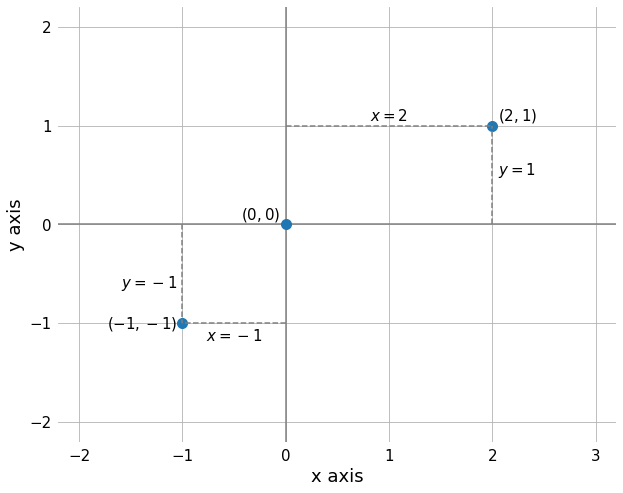

In [60]:
params = {'axes.labelsize': 18,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          }
text_size = 15

pylab.rcParams.update(params)

ax = plt.figure(figsize=(10,8)).gca()

plt.plot([-2.2,3.2],[0,0], '-', color='gray')
plt.plot([0,0], [-2.2,2.2], '-', color='gray')
plt.plot([0,2,-1], [0,1,-1], 'o', markersize=10)
plt.text(2.05, 1.05, '$(2,1)$', fontsize=text_size)
plt.text(-0.05, 0.05, '$(0,0)$', fontsize=text_size, ha='right')
plt.text(-1.05, -1.05, '$(-1,-1)$', fontsize=text_size, ha='right')

plt.plot([0,2], [1,1], '--', color='gray')
plt.text(1, 1.05, '$x=2$', fontsize=text_size, ha='center')
plt.plot([2,2],[0,1], '--', color='gray')
plt.text(2.05, 0.5, '$y=1$', fontsize=text_size)

plt.plot([0,-1], [-1,-1], '--', color='gray')
plt.text(-0.5, -1.05, '$x=-1$', fontsize=text_size, va='top', ha='center')
plt.plot([-1,-1],[0,-1], '--', color='gray')
plt.text(-1.05, -0.5, '$y=-1$', fontsize=text_size, va='top', ha='right')

plt.xlim(-2.2,3.2)
plt.ylim(-2.2,2.2)
plt.grid(True)

plt.xlabel('x axis')
plt.ylabel('y axis')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# Set borders off: https://stackoverflow.com/a/28720127/11524628
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
print('Figure 3-1. Standard Cartesian coordinate system.' +  
      'The horizontal axis is conventionally called x and the vertical axis y.' + 
      'The two axes form a grid with equidistant spacing. Here, both the x and y grid lines are seperated by units of one.')

In [158]:
# Load data
df = pd.read_csv("../data/resources/ncdc_normals.tsv",sep="\t")
df['location'] = df['station_id'].map({
    "USW00014819": 'Chicago',
    "USW00093107": 'San Francisco',
    "USW00012918": 'Houston',
    "USC00042319": 'Death Valley',
})
df.dropna(inplace=True)
df.sort_values(by=["month", "day"],inplace=True)
df = df[['month', 'day', 'location', 'station_id', 'temperature']]
df.reset_index(drop=True,inplace=True)
df['temperature'] = df['temperature'].astype(int)
houston = df[df['location']=='Houston']

# Create Houston temparature df
houston_temp = pd.DataFrame(houston.groupby('month')['temperature'].mean())
houston_temp.reset_index(inplace=True)
houston_temp['month'] = houston_temp['month'].map(lambda x: calendar.month_abbr[x])
houston_temp.loc[12, :] = ['Jan', houston_temp.loc[0, 'temperature']]
houston_temp

,month,temperature
0,Jan,53.419355
1,Feb,56.931034
2,Mar,62.935484
3,Apr,69.400000
4,May,76.580645
5,Jun,81.566667
6,Jul,83.354839
7,Aug,83.774194
8,Sep,79.600000
9,Oct,71.709677


Figure 3-2. Daily temperature normals for Houston, TX. Temperature is mpped to the y axis and day of the year to the x axis. Parts (a), (b), and (c) show the same figure in different aspect ratios.


/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


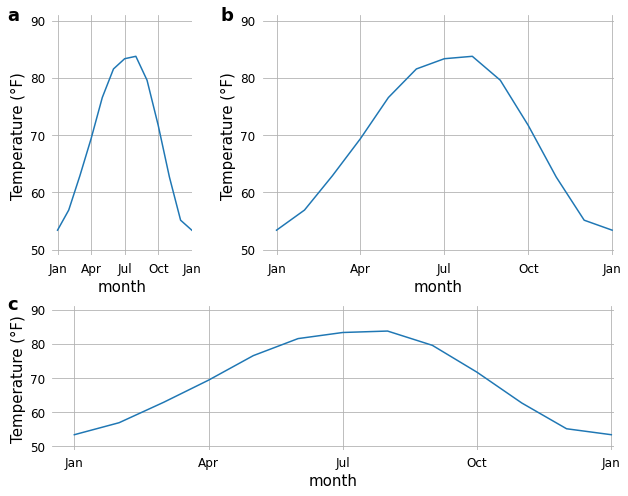

In [155]:
params = {'axes.labelsize': 15,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          }

pylab.rcParams.update(params)

fig = plt.figure(figsize=(12, 8), constrained_layout=True)
spec = fig.add_gridspec(nrows=5, ncols=3, left=0.05, right=0.7, hspace=1.1, wspace=0.5)

ax0 = fig.add_subplot(spec[0:3, 0])
ax0.text(-4.5, 90, 'a', fontsize=18, weight='bold')
ax1 = fig.add_subplot(spec[0:3, 1:])
ax1.text(-2, 90, 'b', fontsize=18, weight='bold')
ax2 = fig.add_subplot(spec[3:, :])
ax2.text(-1.5, 90, 'c', fontsize=18, weight='bold')

axes = [ax0, ax1, ax2]

for ax in axes:
    ax.plot(houston_temp.index, houston_temp['temperature'], '-')
    ax.set_ylabel('Temperature (°F)')
    ax.set_xlabel('month')
    ax.grid(True)
    
    ax.set_xlim(-0.5, 12.05)
    ax.set_xticks(np.arange(0, 13, 3))
    ax.set_xticklabels(['Jan', 'Apr', 'Jul', 'Oct', 'Jan'])
    ax.set_ylim([49, 91])
    ax.set_yticks(np.arange(50, 91, 10))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
    
print('Figure 3-2. Daily temperature normals for Houston, TX.' +
      ' Temperature is mpped to the y axis and day of the year to the x axis.' + 
      ' Parts (a), (b), and (c) show the same figure in different aspect ratios.')

In [235]:
# Houston against San Francisco
houston_sanfranc = df[df.location.isin(['Houston', 'San Francisco'])]
houston_vs_sanfranc = houston_sanfranc.groupby(['month', 'location'])['temperature'].mean().unstack()
houston_vs_sanfranc.loc[13,:] = houston_vs_sanfranc.loc[1,:]
houston_vs_sanfranc

location,Houston,San Francisco
month,,
1,53.419355,55.483871
2,56.931034,56.000000
3,62.935484,56.967742
4,69.400000,59.433333
5,76.580645,62.774194
6,81.566667,66.100000
7,83.354839,70.580645
8,83.774194,72.000000
9,79.600000,70.333333


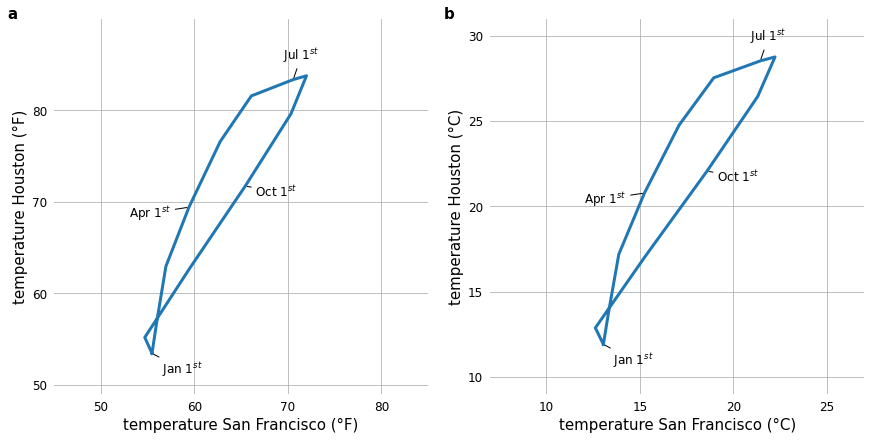

In [274]:
linewidth = 3
txt_size=12

fig = plt.figure(figsize=(12, 6), constrained_layout=True)
spec = fig.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.7)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(houston_vs_sanfranc['San Francisco'].to_list(), houston_vs_sanfranc['Houston'].to_list(), '-', linewidth=linewidth)
ax0.set_ylabel('temperature Houston (°F)')
ax0.set_xlabel('temperature San Francisco (°F)')
ax0.set_ylim([49, 90])
ax0.set_yticks(np.arange(50, 81, 10))
ax0.set_xlim([45, 85])
ax0.set_xticks(np.arange(50, 81, 10))
ax0.text(40, 90, 'a', fontsize=15, weight='bold')

ax1 = fig.add_subplot(spec[0, 1])
ax1.plot((houston_vs_sanfranc['San Francisco'] - 32)/1.8, 
         (houston_vs_sanfranc['Houston'] - 32)/1.8, 
         '-', linewidth=linewidth)
ax1.set_ylabel('temperature Houston (°C)')
ax1.set_xlabel('temperature San Francisco (°C)')
ax1.set_ylim([9, 31])
ax1.set_yticks(np.arange(10,31,5))
ax1.set_xlim([7, 27])
ax1.set_xticks(np.arange(10,26,5))
ax1.text(4.5, 31, 'b', fontsize=15, weight='bold')

# Annotations
idice = [1, 4, 7, 10]
texts = ['Jan $1^{st}$', 'Apr $1^{st}$', 'Jul $1^{st}$', 'Oct $1^{st}$']
xytexts = [(10, -20), (-60, -10), (-10, 20), (10, -10)]

for idx, txt, xytext in zip(idice, texts, xytexts):
    ax0.annotate(txt, xy=(houston_vs_sanfranc['San Francisco'][idx], houston_vs_sanfranc['Houston'][idx]), 
                 xytext=xytext, textcoords='offset points', 
                 arrowprops=dict(arrowstyle="-"),
                 fontsize=txt_size)
    
    ax1.annotate(txt, xy=((houston_vs_sanfranc['San Francisco'][idx]-32)/1.8, (houston_vs_sanfranc['Houston'][idx]-32)/1.8), 
                 xytext=xytext,
                 arrowprops=dict(arrowstyle="-"),
                 textcoords='offset points', fontsize=txt_size)

axes = [ax0, ax1]

for ax in axes:
    ax.grid(True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)

Figure 3-3. Daily temperature normals for Houston, TX, plotted versus the respective temperature normals of San Diego, CA. The first days of the months January, April, July, and October are highlighted to provide a temporal reference.

## Nonlinear axes

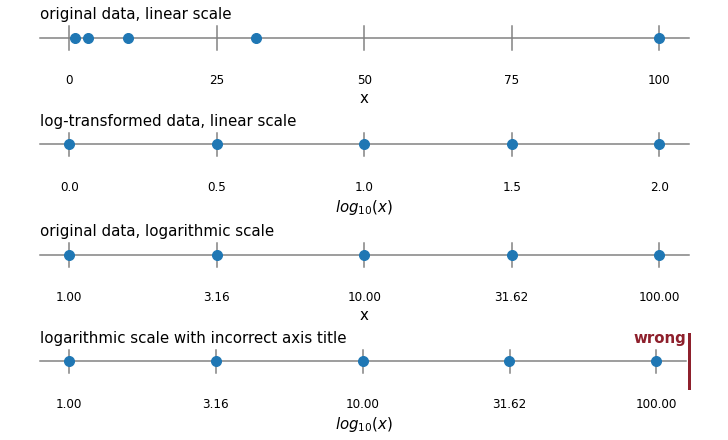

In [360]:
params = {'axes.labelsize': 15,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          'axes.titlesize': 15,
          'axes.titlepad': 10,
          }

pylab.rcParams.update(params)

xs = [1, 3.16, 10, 31.6, 100]

fig, axes = plt.subplots(4,1, figsize=(10, 6), constrained_layout=True)

i = 0
axes[i].plot([-5, 105], [0, 0], '-', color='gray')
tick_locs = [0, 25, 50, 75, 100]
axes[i].set_xticks(tick_locs)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot(xs, [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('x')
axes[i].text(-5, 0.7, 'original data, linear scale', 
             ha='left', va='bottom', fontsize=15)

i = 1
axes[i].plot([-0.1, 2.1], [0, 0], '-', color='gray')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0]
axes[i].set_xticks(tick_locs)
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([np.log10(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('$log_{10}(x)$')
axes[i].text(-0.1, 0.7, 'log-transformed data, linear scale', 
             ha='left', va='bottom', fontsize=15)

i = 2
axes[i].plot([-0.1, 2.1], [0, 0], '-', color='gray')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0]
axes[i].set_xticks(tick_locs)
axes[i].set_xticklabels(['{:.2f}'.format(10**x) for x in tick_locs])
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([np.log10(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('x')
axes[i].text(-0.1, 0.7, 'original data, logarithmic scale', 
             ha='left', va='bottom', fontsize=15)

i = 3
axes[i].plot([-0.1, 2.1], [0, 0], '-', color='gray')
tick_locs = [0.0, 0.5, 1.0, 1.5, 2.0]
axes[i].set_xticks(tick_locs)
axes[i].set_xticklabels(['{:.2f}'.format(10**x) for x in tick_locs])
for loc in tick_locs:
    axes[i].plot([loc, loc], [-0.5,0.5], '-', color='gray')
axes[i].plot([np.log10(x) for x in xs], [0]*len(xs), 'o', markersize=10)
axes[i].set_xlabel('$log_{10}(x)$')
axes[i].text(-0.1, 0.7, 'logarithmic scale with incorrect axis title', 
             ha='left', va='bottom', fontsize=15)
axes[i].plot([2.11, 2.11], [-1.2,1.2], '-', color='#8E202C', linewidth=3)
axes[i].text(2.1, 0.7, 'wrong', fontweight='bold', fontsize=15, va='bottom', ha='right', color='#8E202C')

for ax in axes:
    ax.set_ylim([-1.2, 1.2])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

Relationship between linear and logarithmic scales. The dots correspond to the data values 1, 3.16, 10, 31.6, and 100, which are evenly spaced numbers on a logarithmic scale. We can display these data points on a linear scale, we can log-transform them and then show them on a linear scale, or we can show them on a logarithmic scale. Importantly, the correct axis title for a logarithmic scale is the name of the variable shown, not the logarithm of that variable.

In [425]:
df = pd.read_csv('../data/resources/US_census.tsv', sep='\t')
texas = df[df.state == 'Texas']
texas['norm_pop2010'] = texas.pop2010 / texas.pop2010.median()
texas.sort_values('norm_pop2010', ascending=False, inplace=True)
texas.reset_index(drop=True, inplace=True)
texas.name = texas.name.str.replace(' County', '')
texas

/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/hnguyent/miniconda3/envs/dataviz/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,state,name,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,white,...,manufacturer_shipments_2007,mercent_whole_sales_2007,sales,sales_per_capita,accommodation_food_service,building_permits,fed_spending,area,density,norm_pop2010
0,Texas,Harris,48201.0,4092459.0,3400578.0,8.2,28.0,8.1,50.2,56.6,...,169275136.0,205478751.0,51899053.0,13276.0,7874724.0,15039.0,29940175.0,1703.48,2402.4,222.646156
1,Texas,Dallas,48113.0,2368139.0,2218899.0,8.1,27.6,8.8,50.6,53.5,...,39047030.0,58165146.0,33177208.0,13929.0,5705137.0,5485.0,17621936.0,871.28,2718.0,128.836244
2,Texas,Tarrant,48439.0,1809034.0,1446219.0,7.9,28.0,8.9,51.0,66.6,...,43337529.0,25801512.0,24931407.0,14582.0,3763516.0,5089.0,8195152.0,863.61,2094.7,98.418693
3,Texas,Bexar,48029.0,1714773.0,1392931.0,7.6,27.1,10.3,51.0,72.9,...,12305089.0,12232098.0,22815281.0,14359.0,3829048.0,4653.0,19444429.0,1239.82,1383.1,93.290517
4,Texas,Travis,48453.0,1024266.0,812280.0,7.4,23.9,7.3,49.6,69.3,...,28294664.0,14119812.0,13879471.0,14302.0,2833744.0,4397.0,16949198.0,990.20,1034.4,55.724172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Texas,McMullen,48311.0,707.0,851.0,4.0,16.8,26.4,48.1,90.9,...,0.0,0.0,NaN,NaN,NaN,0.0,7201.0,1139.43,0.6,0.038464
250,Texas,Borden,48033.0,641.0,729.0,4.4,21.5,20.7,47.7,93.6,...,0.0,0.0,NaN,NaN,0.0,0.0,5881.0,897.44,0.7,0.034873
251,Texas,Kenedy,48261.0,416.0,414.0,6.5,24.5,14.2,49.0,87.5,...,0.0,0.0,0.0,0.0,0.0,0.0,4012.0,1458.33,0.3,0.022632
252,Texas,King,48269.0,286.0,356.0,3.8,23.8,13.3,50.7,93.7,...,0.0,0.0,0.0,0.0,0.0,0.0,6722.0,910.87,0.3,0.015560


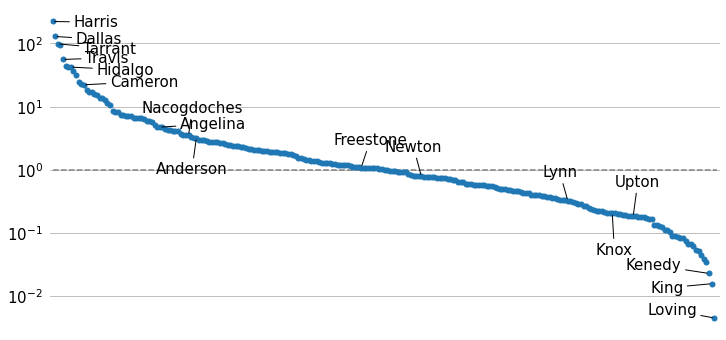

In [506]:
random.seed(42)
txt_size = 15
params = {'axes.labelsize': 15,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.titlesize': 15,
          'axes.titlepad': 10,
          'ytick.minor.size': 0,
          'ytick.minor.width': 0
          }

pylab.rcParams.update(params)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_yscale('log')
ax.plot([0,len(texas)], [1, 1], '--', color='gray')
ax.plot(range(0,len(texas)), texas.norm_pop2010.values, 'o', markersize=5)

county_idx = sorted(list(range(0,3)) 
                    + list(range(len(texas)-3, len(texas)))
                    + list(random.sample(range(4, sum(texas.norm_pop2010 > 10)), 3))
                    + list(random.sample(range(sum(texas.norm_pop2010 > 10)+1, sum(texas.norm_pop2010 > 1)), 4))
                    + list(random.sample(range(sum(texas.norm_pop2010 > 1)+1, sum(texas.norm_pop2010 > 0.1)), 4))
                    )

xytexts = []
has = []
vas = []

for i in county_idx:
    if i < 50:
        xytexts.append((random.uniform(20, 30), random.uniform(-5,5)))
        has.append('left')
        vas.append('center')
        
    elif i > len(texas) - 30:
        xytexts.append((random.uniform(-30, -10), random.uniform(-10,10)))
        has.append('right')
        vas.append('center')
    
    else:
        xytext = (random.uniform(-10, 10), random.choice(list(range(-30,-20)) + list(range(20,30))))
        xytexts.append(xytext)
        has.append('center')
        if xytext[1] < 0:
            vas.append('top')
        else:
            vas.append('bottom')
        
for i, xytext, va, ha in zip(county_idx, xytexts, vas, has):
    ax.annotate(texas.name[i], xy=(i, texas.norm_pop2010.values[i]),
                 xytext=xytext, textcoords='offset points', ha=ha, va=va,
                 arrowprops=dict(arrowstyle="-"),
                 fontsize=txt_size)
    
ax.set_xlim([-1, len(texas)+1])
ax.yaxis.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)


Figure 3-5. Population numbers of Texas counties relative to their median value. Select countries are highlighted by namw. The dashed line indicates a ratio of 1, corresponding to a county with median population number. The most populous counties have approximately 100 times more inhabitants than the median county, and the least populous counties have approximately 100 times fewer inhabitants than the median county.